<a href="https://colab.research.google.com/github/muhamadfarrelrizqullah/PCVK_Ganjil_2023/blob/main/ProjekKelompok_DeteksiRPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://raw.githubusercontent.com/alvianfirdaus/Kelompok3_ML/main/Kuis%201/img/header.png"><p><table>
  <tr>
    <th>Mata Kuliah </th>
    <td>Pengolahan Citra Visi Komputer</td>
  </tr>
  <tr>
    <th>Ide Projek</th>
    <td>Deteksi Batu Gunting Kertas</td>
  </tr>

  <tr>
    <th>Kelompok</th>
    <td>Kelompok 14</td>
  </tr>
  <tr>
    <th>Nama Anggota Kelompok</th>
    <td><p>
     Mochammad Aditya Bagus / 2041720093<p>
     Muhamad Farrel Rizqullah / 2141720243<p>
</td>
  </tr>
</table>

**Import library**

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

import numpy as np
from google.colab import files
import keras.utils as image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.models import load_model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load data**

In [3]:
!unzip '/content/drive/MyDrive/rockpaperscissors.zip' -d '/tmp/'

Archive:  /content/drive/MyDrive/rockpaperscissors.zip
   creating: /tmp/rockpaperscissors/paper/
  inflating: /tmp/rockpaperscissors/paper/paper01-000.png  
  inflating: /tmp/rockpaperscissors/paper/paper01-001.png  
  inflating: /tmp/rockpaperscissors/paper/paper01-002.png  
  inflating: /tmp/rockpaperscissors/paper/paper01-003.png  
  inflating: /tmp/rockpaperscissors/paper/paper01-004.png  
  inflating: /tmp/rockpaperscissors/paper/paper01-005.png  
  inflating: /tmp/rockpaperscissors/paper/paper01-006.png  
  inflating: /tmp/rockpaperscissors/paper/paper01-007.png  
  inflating: /tmp/rockpaperscissors/paper/paper01-008.png  
  inflating: /tmp/rockpaperscissors/paper/paper01-009.png  
  inflating: /tmp/rockpaperscissors/paper/paper01-010.png  
  inflating: /tmp/rockpaperscissors/paper/paper01-011.png  
  inflating: /tmp/rockpaperscissors/paper/paper01-012.png  
  inflating: /tmp/rockpaperscissors/paper/paper01-013.png  
  inflating: /tmp/rockpaperscissors/paper/paper01-014.png  
  

In [4]:
import os

# Daftar kategori
data = ['paper', 'scissors', 'rock']

# Menghitung jumlah file (gambar) dalam setiap kategori
for data in data:
    print(f'{data} images: ', len(os.listdir(f'/tmp/rockpaperscissors/{data}')))

paper images:  840
scissors images:  840
rock images:  840


In [5]:
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'rps-cv-images')
validation_dir = os.path.join(base_dir, 'rps-cv-images')

**Membuat direktori untuk data latih dan validasi RPS**

In [7]:
# Pembuatan direktori untuk data latih dan validasi untuk batu, kertas, dan gunting.
train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')
validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

**Mengatur generator data latih dan generator data validasi**

In [9]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        horizontal_flip=True,
        shear_range = 0.2,
        zoom_range = 0.2,
        validation_split = 0.2,
        fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(100, 100),
        batch_size=32,
        color_mode = 'rgb',
        shuffle=True,
        subset = 'training',
        class_mode = 'categorical')

validation_generator = train_datagen.flow_from_directory(
        validation_dir,
        target_size=(100, 100),
        batch_size=32,
        color_mode = 'rgb',
        shuffle=False,
        subset = 'validation',
        class_mode = 'categorical')

Found 300 images belonging to 3 classes.
Found 72 images belonging to 3 classes.


**Membuat sebuah instance dari model VGG16**

In [10]:
#Dibuat dari instance model sebelumnya
class_base = keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(100, 100, 3)
)
class_base.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


**Membuat model neural network menggunakan TensorFlow Keras**

In [11]:
final_model = tf.keras.models.Sequential([
    class_base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

final_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 14846787 (56.64 MB)
Trainable params: 132099 (516.01 KB)
Non-trainable params: 14714688 (56.13 MB)
_________

**Melakukan proses kompilasi dan pelatihan untuk model neural network**

In [12]:
final_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model_fit = final_model.fit_generator(
    train_generator,
    validation_data  = validation_generator,
    epochs = 10,
    verbose = 1
)

<ipython-input-12-e95489c19c99>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_fit = final_model.fit_generator(


Epoch 1/10
10/10 [==============================] - 16s 378ms/step - loss: 1.0210 - accuracy: 0.5033 - val_loss: 0.7266 - val_accuracy: 0.8750
Epoch 2/10
10/10 [==============================] - 2s 223ms/step - loss: 0.6720 - accuracy: 0.7800 - val_loss: 0.4880 - val_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 2s 264ms/step - loss: 0.5064 - accuracy: 0.8300 - val_loss: 0.4565 - val_accuracy: 0.8056
Epoch 4/10
10/10 [==============================] - 2s 230ms/step - loss: 0.3793 - accuracy: 0.9033 - val_loss: 0.3423 - val_accuracy: 0.9028
Epoch 5/10
10/10 [==============================] - 4s 412ms/step - loss: 0.3045 - accuracy: 0.9367 - val_loss: 0.2473 - val_accuracy: 0.9306
Epoch 6/10
10/10 [==============================] - 3s 321ms/step - loss: 0.2492 - accuracy: 0.9567 - val_loss: 0.2512 - val_accuracy: 0.8889
Epoch 7/10
10/10 [==============================] - 2s 225ms/step - loss: 0.1828 - accuracy: 0.9567 - val_loss: 0.2902 - val_accuracy: 0.9167
Epoch

**Simpan model ke dalam drive**

In [13]:
save_path ='/content/drive/MyDrive/dataset/models/PCVK/rockpaperscissorsm4'
final_model.save(save_path)

**Load model yang sudah disimpan**

In [14]:
save_path = '/content/drive/MyDrive/dataset/models/PCVK/rockpaperscissorsm4'
final_model = load_model(save_path)

**Melakukan prediksi dengan gambar**

Saving testscissors03-28.png to testscissors03-28.png
1/1 [==============================] - 1s 592ms/step
Gambar ini termasuk ke dalam kelas: Gunting


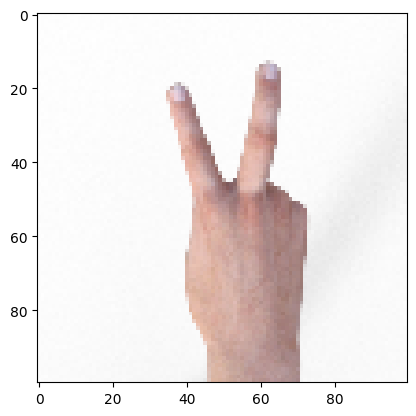

In [15]:
uploaded = files.upload()

for itr in uploaded.keys():

  path = itr
  picture = image.load_img(path, target_size=(100,100))
  imgplot = plt.imshow(picture)
  x = image.img_to_array(picture)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = final_model.predict(images, batch_size=7)
  define_class = int(classes.argmax(axis=-1))
  if (define_class==0):
    print("Gambar ini termasuk ke dalam kelas: Kertas")
  elif (define_class==1):
    print("Gambar ini termasuk ke dalam kelas: Batu")
  elif (define_class==2):
    print("Gambar ini termasuk ke dalam kelas: Gunting")

Saving testrock01-00.png to testrock01-00.png
1/1 [==============================] - 0s 22ms/step
Gambar ini termasuk ke dalam kelas: Batu


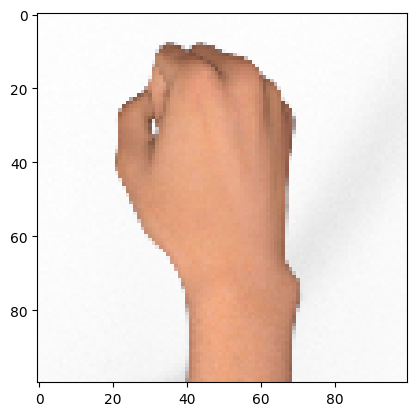

In [16]:
uploaded = files.upload()

for itr in uploaded.keys():

  path = itr
  picture = image.load_img(path, target_size=(100,100))
  imgplot = plt.imshow(picture)
  x = image.img_to_array(picture)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = final_model.predict(images, batch_size=7)
  define_class = int(classes.argmax(axis=-1))
  if (define_class==0):
    print("Gambar ini termasuk ke dalam kelas: Kertas")
  elif (define_class==1):
    print("Gambar ini termasuk ke dalam kelas: Batu")
  elif (define_class==2):
    print("Gambar ini termasuk ke dalam kelas: Gunting")

Saving testpaper04-01.png to testpaper04-01.png
1/1 [==============================] - 0s 19ms/step
Gambar ini termasuk ke dalam kelas: Kertas


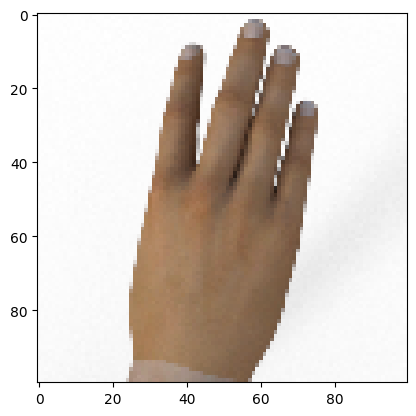

In [19]:
uploaded = files.upload()

for itr in uploaded.keys():

  path = itr
  picture = image.load_img(path, target_size=(100,100))
  imgplot = plt.imshow(picture)
  x = image.img_to_array(picture)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = final_model.predict(images, batch_size=7)
  define_class = int(classes.argmax(axis=-1))
  if (define_class==0):
    print("Gambar ini termasuk ke dalam kelas: Kertas")
  elif (define_class==1):
    print("Gambar ini termasuk ke dalam kelas: Batu")
  elif (define_class==2):
    print("Gambar ini termasuk ke dalam kelas: Gunting")

In [ ]:
uploaded = files.upload()

for itr in uploaded.keys():

  path = itr
  picture = image.load_img(path, target_size=(100,100))
  imgplot = plt.imshow(picture)
  x = image.img_to_array(picture)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = final_model.predict(images, batch_size=7)
  define_class = int(classes.argmax(axis=-1))
  if (define_class==0):
    print("Gambar ini termasuk ke dalam kelas: Kertas")
  elif (define_class==1):
    print("Gambar ini termasuk ke dalam kelas: Batu")
  elif (define_class==2):
    print("Gambar ini termasuk ke dalam kelas: Gunting")